In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

## Prepare simulated data


In [3]:
import sys
sys.path.append('../')
from pysampler.generate import sampler, statistics
# from massf_sampler import mass_function

In [4]:
def mass_function(massx):
    phi_star, alpha, m_star = 4.032e-3, -0.45, 10**10.62
    m = np.linspace(1e10, 1e14)
    x = m / m_star
    mf = phi_star * np.power(x, alpha) * np.exp(-x)
    return np.interp(massx, m, mf )

In [6]:
mass = []
nbins=50
blue = (4.032e-3, -0.45, 10**10.62) # Schechter blue parameters

for i in range(10):
    sample = sampler(mass_function, 1e10,1e14,resolution=1000, size=1000000)
    mass.append(sample)

In [7]:
average_sample, bin_center, mean, std = statistics(np.log10(mass), nbins)

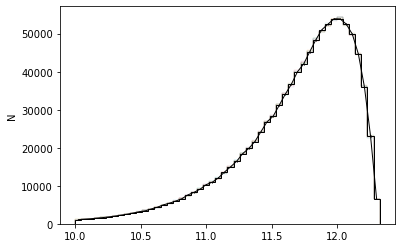

In [10]:
for mm in mass:
    plt.hist(np.log10(mm), bins=nbins, histtype='step', lw=0.1)

plt.hist(average_sample, bins=nbins, histtype='step', color='k')
plt.errorbar(bin_center, mean, yerr=std, color='k', lw=1) 

plt.ylabel('N')
plt.savefig('../docs/_static/shechter_sampler.pdf')
plt.show()